In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Notebook visuals
%matplotlib inline
sns.set(style="whitegrid")


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("credit_data.csv")

# Show the first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [5]:
# Shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Info about data types and non-null values
df.info()

# Summary statistics for numerical features
df.describe()


Dataset Shape: (28481, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28481 entries, 0 to 28480
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,...,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000,28481.000000
mean,94878.522664,-0.007086,-0.002514,0.004905,0.003783,-0.001955,-0.003035,-0.004552,-0.000183,-0.006977,...,-0.002948,0.006349,-0.002169,-0.002000,0.006552,0.005038,0.002891,-0.001943,87.842797,0.001615
std,47490.564834,1.978423,1.672097,1.536368,1.418356,1.367306,1.317783,1.216406,1.209943,1.105506,...,0.716262,0.723141,0.604830,0.609338,0.521011,0.482026,0.415631,0.336875,228.021833,0.040157
min,0.000000,-34.148234,-48.060856,-33.680984,-5.560118,-23.669726,-20.869626,-31.197329,-50.420090,-9.462573,...,-22.889347,-8.887017,-22.575000,-2.824849,-3.963454,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54354.000000,-0.921109,-0.598966,-0.888363,-0.846227,-0.701100,-0.768846,-0.564060,-0.211852,-0.650129,...,-0.228182,-0.539924,-0.164473,-0.355604,-0.311201,-0.322289,-0.071650,-0.053254,5.850000,0.000000
50%,84628.000000,0.013240,0.065459,0.185381,-0.024544,-0.053946,-0.271935,0.033205,0.020880,-0.054374,...,-0.028402,0.016053,-0.014325,0.042357,0.029078,-0.046561,0.000099,0.010443,21.990000,0.000000
75%,139343.000000,1.315782,0.801249,1.044630,0.739501,0.611056,0.399630,0.576081,0.324336,0.590223,...,0.187241,0.528281,0.145020,0.437848,0.351981,0.247901,0.089816,0.077913,77.280000,0.000000
max,172782.000000,2.393578,18.902453,9.382558,12.699542,29.016124,16.493227,21.437514,17.052566,15.594995,...,27.202839,8.272233,22.083545,3.664552,6.070850,2.991210,9.200883,15.942151,5239.500000,1.000000


In [7]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Check distribution of the target variable (Class)
print("\nClass Distribution:")
print(df['Class'].value_counts())



Class Distribution:
Class
0    28435
1       46
Name: count, dtype: int64


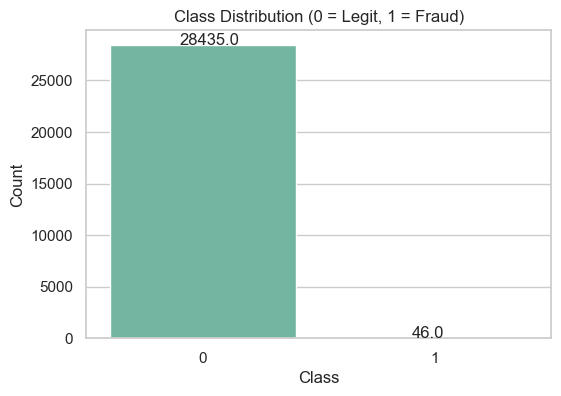

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Class', hue='Class', palette='Set2', legend=False)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 10))

plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [17]:
# Show percentage distribution
fraud_pct = df['Class'].value_counts(normalize=True) * 100
print(fraud_pct)


Class
0    99.838489
1     0.161511
Name: proportion, dtype: float64


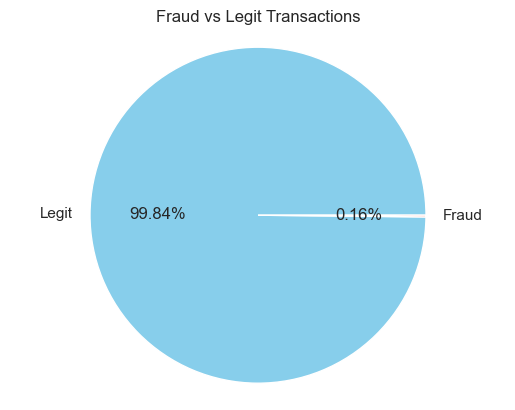

In [19]:
# Pie chart of class distribution
labels = ['Legit', 'Fraud']
sizes = df['Class'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title("Fraud vs Legit Transactions")
plt.axis('equal')
plt.show()


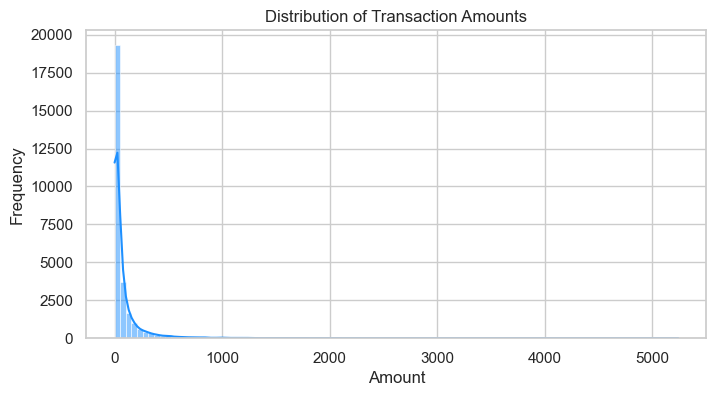

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=100, kde=True, color='dodgerblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


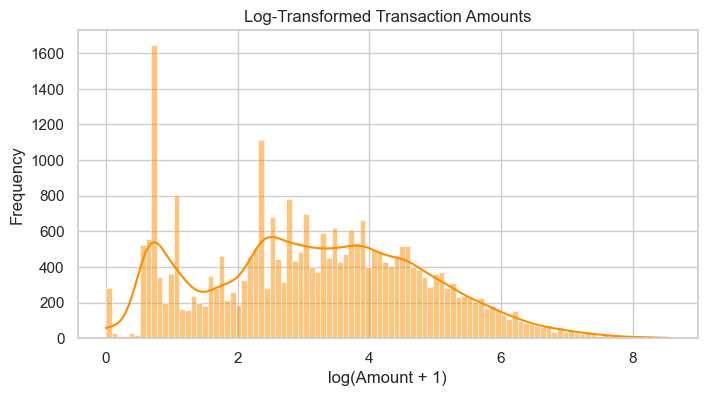

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df['Amount']), bins=100, kde=True, color='darkorange')
plt.title("Log-Transformed Transaction Amounts")
plt.xlabel("log(Amount + 1)")
plt.ylabel("Frequency")
plt.show()


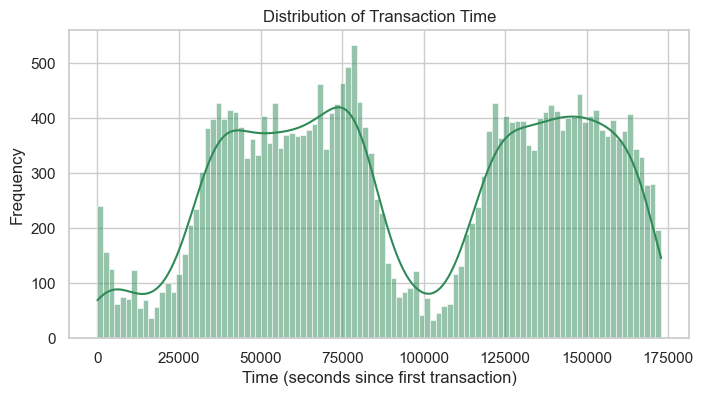

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Time'], bins=100, kde=True, color='seagreen')
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()


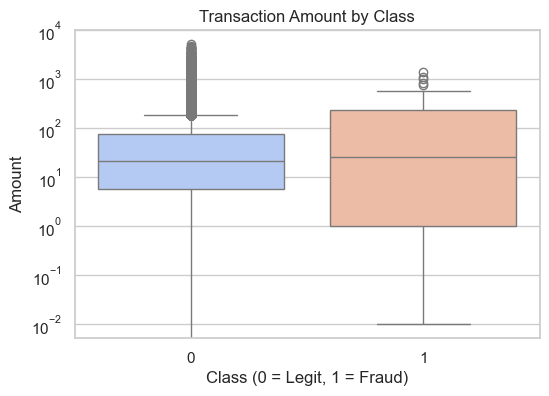

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Class', y='Amount', hue='Class', palette='coolwarm', legend=False)
plt.title("Transaction Amount by Class")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Amount")
plt.yscale('log')  # Better for outliers
plt.show()


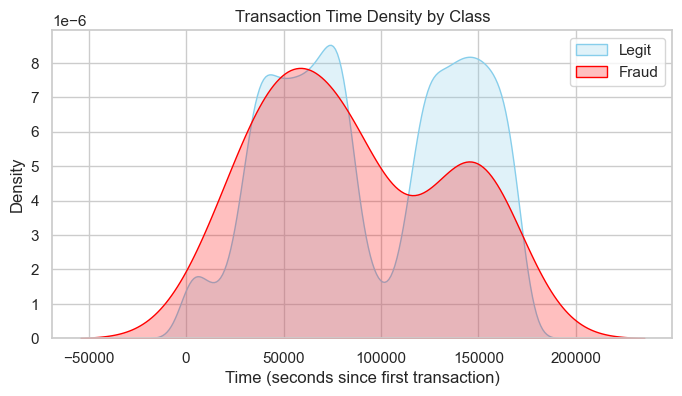

In [31]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df[df['Class'] == 0], x='Time', label='Legit', fill=True, color='skyblue')
sns.kdeplot(data=df[df['Class'] == 1], x='Time', label='Fraud', fill=True, color='red')
plt.title("Transaction Time Density by Class")
plt.xlabel("Time (seconds since first transaction)")
plt.legend()
plt.show()


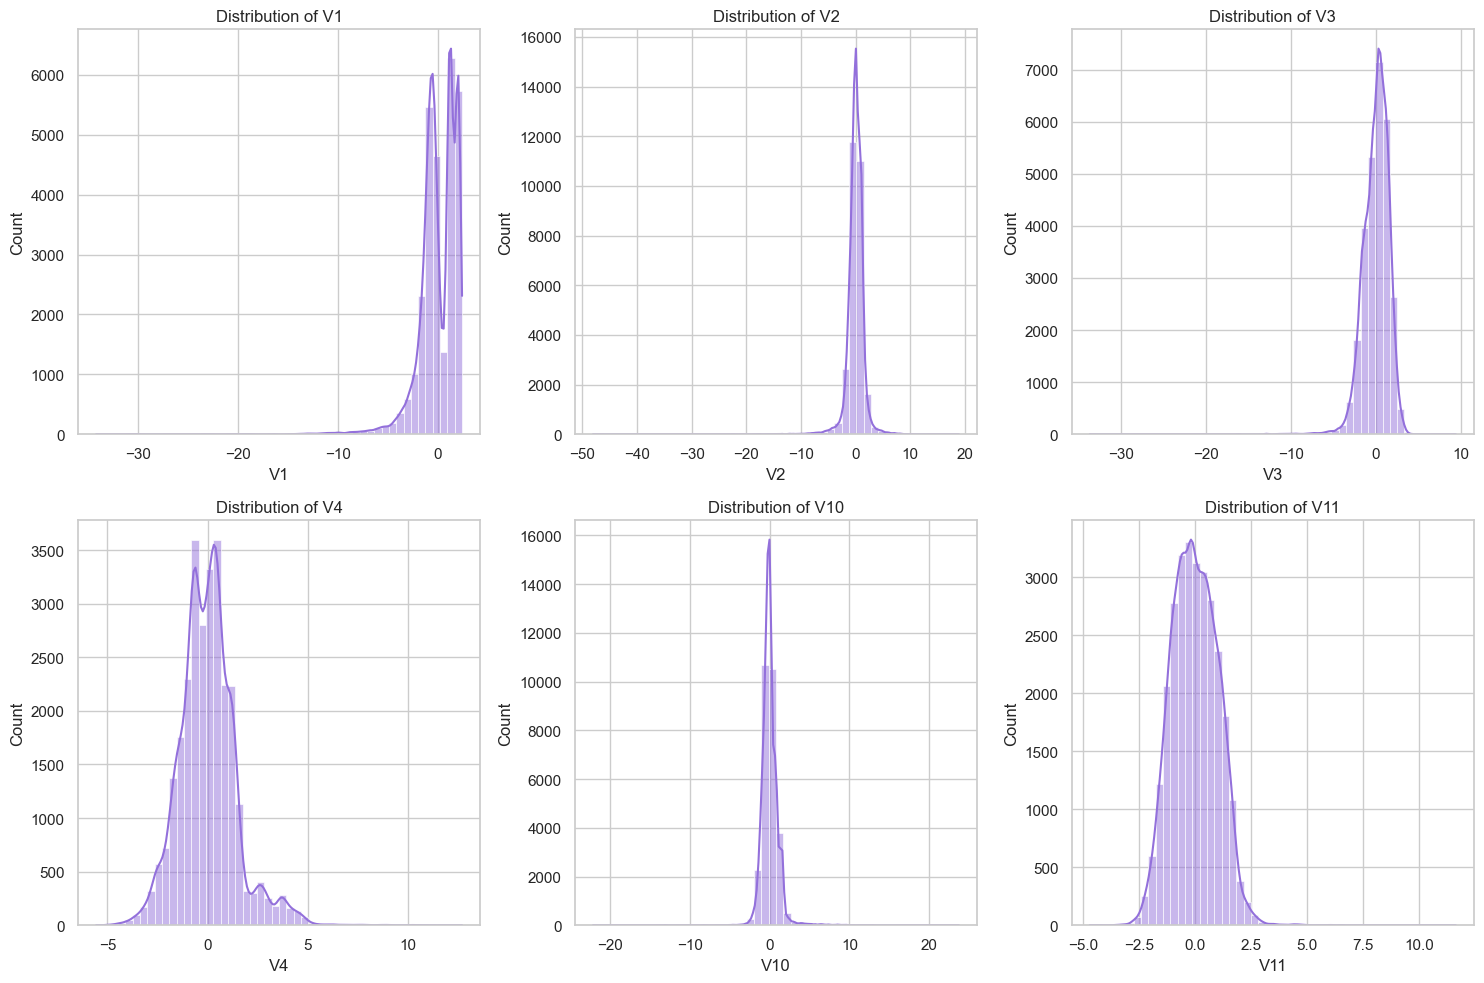

In [35]:
# Pick 6 features for demonstration
features = ['V1', 'V2', 'V3', 'V4', 'V10', 'V11']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=50, kde=True, color='mediumpurple')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [51]:
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']


In [53]:
from sklearn.preprocessing import StandardScaler

# Copy dataset to preserve original
df_scaled = df.copy()

# Apply StandardScaler to relevant columns (exclude 'Class')
scaler = StandardScaler()
columns_to_scale = df_scaled.drop('Class', axis=1).columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


In [55]:
# Split the data: 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures class balance in both sets
)


In [57]:
# Create the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.9843777426715815
Confusion Matrix:
 [[5599   89]
 [   0    9]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.9844    0.9921      5688
           1     0.0918    1.0000    0.1682         9

    accuracy                         0.9844      5697
   macro avg     0.5459    0.9922    0.5802      5697
weighted avg     0.9986    0.9844    0.9908      5697

ROC AUC Score: 0.9998534927332395


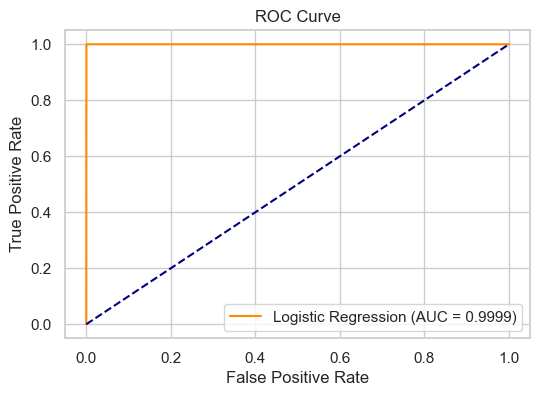

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (AUC = %0.4f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
